In [128]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline

In [129]:
df=pd.read_excel('loan.xlsx')

In [130]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Paid
0,LP001002,Male,No,No,Graduate,Yes,5849,500000,120,1,Urban,Y
1,LP001003,Male,Yes,Yes,Graduate,No,4583,1280000,360,1,Rural,N
2,LP001005,Male,Yes,No,Graduate,Yes,3000,660000,180,1,Urban,Y
3,LP001006,Male,Yes,No,Not Graduate,No,2583,1200000,360,1,Urban,Y
4,LP001008,Male,No,No,Graduate,No,6000,1410000,360,1,Urban,Y


# Count of Loan Paid (Y/N)

In [131]:
df['Loan_Paid'].value_counts()

Y    102
N     48
Name: Loan_Paid, dtype: int64

In [132]:
a=df.groupby(['Married', 'Gender', 'Dependents','Education','Self_Employed'])['Loan_Paid'].count()


In [133]:
a

Married  Gender  Dependents  Education     Self_Employed
No       Female  No          Graduate      No                6
                                           Yes               4
                 Yes         Graduate      No                3
                                           Yes               2
         Male    No          Graduate      No               12
                                           Yes              13
                             Not Graduate  No                4
                 Yes         Graduate      Yes               3
                             Not Graduate  No                1
                                           Yes               1
Yes      Female  No          Graduate      No                1
                                           Yes               3
                             Not Graduate  No                1
                 Yes         Graduate      No                4
                                           Yes               

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x05AE0E90>]],
      dtype=object)

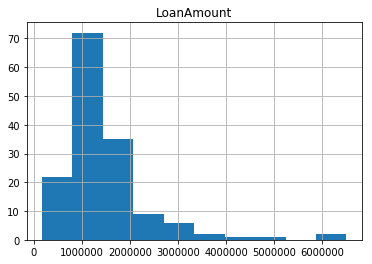

In [134]:
df.hist(column='LoanAmount', bins=10)

Conversion of features into binary variables

In [135]:
df['Married']=df['Married'].replace(to_replace=['Yes','No'], value=[0,1]).values
df['Gender']=df['Gender'].replace(to_replace=['Male','Female'], value=[0,1]).values



In [136]:
df['Dependents']=df['Dependents'].replace(to_replace=['Yes','No'], value=[0,1]).values
df['Education']=df['Education'].replace(to_replace=['Graduate','Not Graduate'], value=[0,1]).values
df['Self_Employed']=df['Self_Employed'].replace(to_replace=['Yes','No'], value=[0,1]).values
df['Property_Area']=df['Property_Area'].replace(to_replace=['Urban','Rural'], value=[0,1]).values

In [137]:
x= df[['Married', 'Gender']] .values  #.astype(float)
x[0:5]

array([[1, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 0]], dtype=int64)

In [138]:
df['Loan_Paid']=df['Loan_Paid'].replace(to_replace=['Y','N'], value=[0,1]).values

In [139]:
y = df['Loan_Paid'].values
y[0:5]

array([0, 1, 0, 0, 0], dtype=int64)

In [140]:
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
x[0:5]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 1.43569652, -0.46852129],
       [-0.69652603, -0.46852129],
       [-0.69652603, -0.46852129],
       [-0.69652603, -0.46852129],
       [ 1.43569652, -0.46852129]])

In [141]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (120, 2) (120,)
Test set: (30, 2) (30,)


# KNN

In [142]:
from sklearn.neighbors import KNeighborsClassifier

In [143]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

In [144]:
#predict the test data
yhat = neigh.predict(x_test)
yhat[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [145]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.675
Test set Accuracy:  0.7


In [146]:
#jaccard_similarity_score
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.7

In [147]:
#check accuracy for different K values
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.43333333, 0.7       , 0.7       , 0.7       , 0.36666667,
       0.63333333, 0.63333333, 0.63333333, 0.63333333])

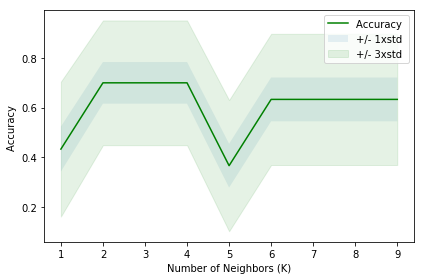

In [148]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [149]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7 with k= 2


# SVM

In [150]:
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score

In [151]:
#SVM
from sklearn import svm
clf=svm.SVC(kernel='sigmoid')
clf.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [152]:
yhat=clf.predict(x_test)

In [153]:
#Evaluation
from sklearn.metrics import f1_score
f1_score(y_test,yhat, average="weighted")

0.5428571428571428

# Logistic Regression

In [154]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(C=0.01, solver="liblinear").fit(x_train, y_train)

In [155]:
#Predict
yhat=LR.predict(x_test)
yhat_prob=LR.predict_proba(x_test)

#Evaluation
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test,yhat)

0.7

# Decision Tree

In [156]:
from sklearn.tree import DecisionTreeClassifier

In [157]:
clf=DecisionTreeClassifier()

In [158]:
clf=clf.fit(x_train,y_train)

In [159]:
y_train=clf.predict(x_test)

In [160]:
jaccard_similarity_score(y_test,y_train)

0.7